#1.Understanding the Problem Statement
Problem: Sentiment Analysis on Product Reviews

Objective: Classify reviews as Positive (1) or Negative (0)

Target Variable: 'Sentiment'

Input Feature: 'Review' (text data)

#2.Collection and Preprocessor Data

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [33]:
# Save the synthetic dataset to a CSV file
df = pd.read_csv('/content/IMDB Dataset.csv')



In [34]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [36]:
df.isnull().sum()

,0
review,0
sentiment,0


In [37]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english')) # Changed step_words to stop_words

def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return ' '.join(tokens)

#Apply preprocessing
df['Cleaned_Review'] = df['review'].apply(preprocess_text)

#3.Exploratory data Analysis(EDA)


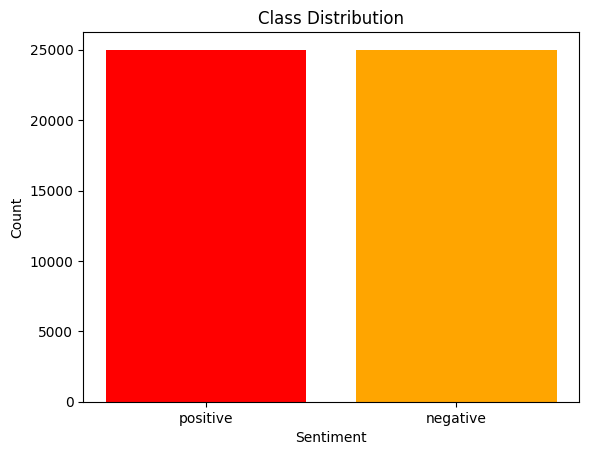

In [38]:
# Analyze class distribution
class_counts = df['sentiment'].value_counts()
plt.bar(class_counts.index,class_counts.values,color=['red','orange','blue'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   review          50000 non-null  object
 1   sentiment       50000 non-null  object
 2   Cleaned_Review  50000 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


In [40]:
df.drop('review',axis=1,inplace=True)

#5.Split the dataset

In [49]:
#Feature(cleaned review) and Target (sentiment)
X = df['Cleaned_Review']
y = df['sentiment']

#train_test_split
X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size=0.2,random_state=42)

#Vectorize text using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Save the vectorizer to a pickle file
pickle.dump(vectorizer, open('tfidf_vectorizer.pkl', 'wb'))

#5. Select the Naive Bayes Variant
MultinomialNB is the best choice for text classification as it works well with word frequency or TF-IDF vectors.

#6.Train the model

In [42]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_tfidf,y_train)

MultinomialNB()

#7.Test the model


In [43]:
# predict sentiment for test set
y_pred = model.predict(X_test_tfidf)


#8.Evaluate the model

In [44]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy: 0.8664

Classification Report:
               precision    recall  f1-score   support

    negative       0.85      0.88      0.87      4961
    positive       0.88      0.85      0.86      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000


Confusion Matrix:
 [[4384  577]
 [ 759 4280]]


In [47]:
import pickle
# save model.pkl
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

#9.Testing the model

In [52]:
sentiment ="The concert was superb! Best performance I've ever seen."
sentiment_vecotorized = vectorizer.transform([sentiment])
sentiment_prediction = model.predict(sentiment_vecotorized)
print(sentiment_prediction)

['positive']
